In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

Loading Dataset

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
10,1800,3,82.00
12,1000,2,38.00
8,1310,3,50.00
14,2250,3,101.00
0,1056,2,39.07


Preprocessing

In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

Function Definiton

In [5]:
def stochastic_gradient_descent(x,y_true,epochs,learning_rate = 0.01):
    number_of_features = x.shape[1]
    weights = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x=x[random_index]
        sample_y=y_true[random_index]
        y_predicted = np.dot(weights,sample_x.T) + bias
        #gradient calculation
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        #weights updation
        weights = weights - learning_rate*w_grad
        bias = bias - learning_rate*b_grad
        cost = np.mean(np.square(sample_y-y_predicted))
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return weights,bias,cost,cost_list,epoch_list

w,b,c,cl,el = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)

Visualization

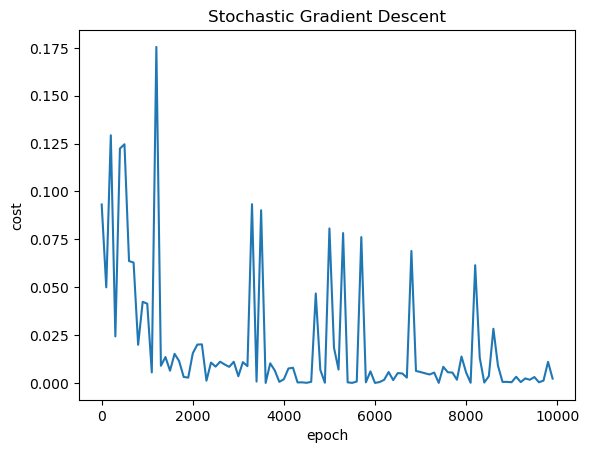

In [6]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Stochastic Gradient Descent")
plt.plot(el,cl)
plt.show()